In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
data = pd.read_csv("./housing_prices.csv")

In [205]:
# Check how many unique values each column has
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")
# Get minimum and maximum value for RAD.
print(" \n Min value in RAD is " + str(min(data['RAD'])) + " and max is " + str(max(data['RAD'])) + ".")

Column 'CRIM' has 509 unique values.
Column 'ZN' has 26 unique values.
Column 'INDUS' has 79 unique values.
Column 'CHAS' has 2 unique values.
Column 'NOX' has 82 unique values.
Column 'RM' has 444 unique values.
Column 'AGE' has 357 unique values.
Column 'DIS' has 416 unique values.
Column 'RAD' has 9 unique values.
Column 'TAX' has 67 unique values.
Column 'PTRATIO' has 47 unique values.
Column 'B' has 360 unique values.
Column 'LSTAT' has 460 unique values.
Column 'MEDV' has 231 unique values.
 
 Min value in RAD is 1 and max is 24.


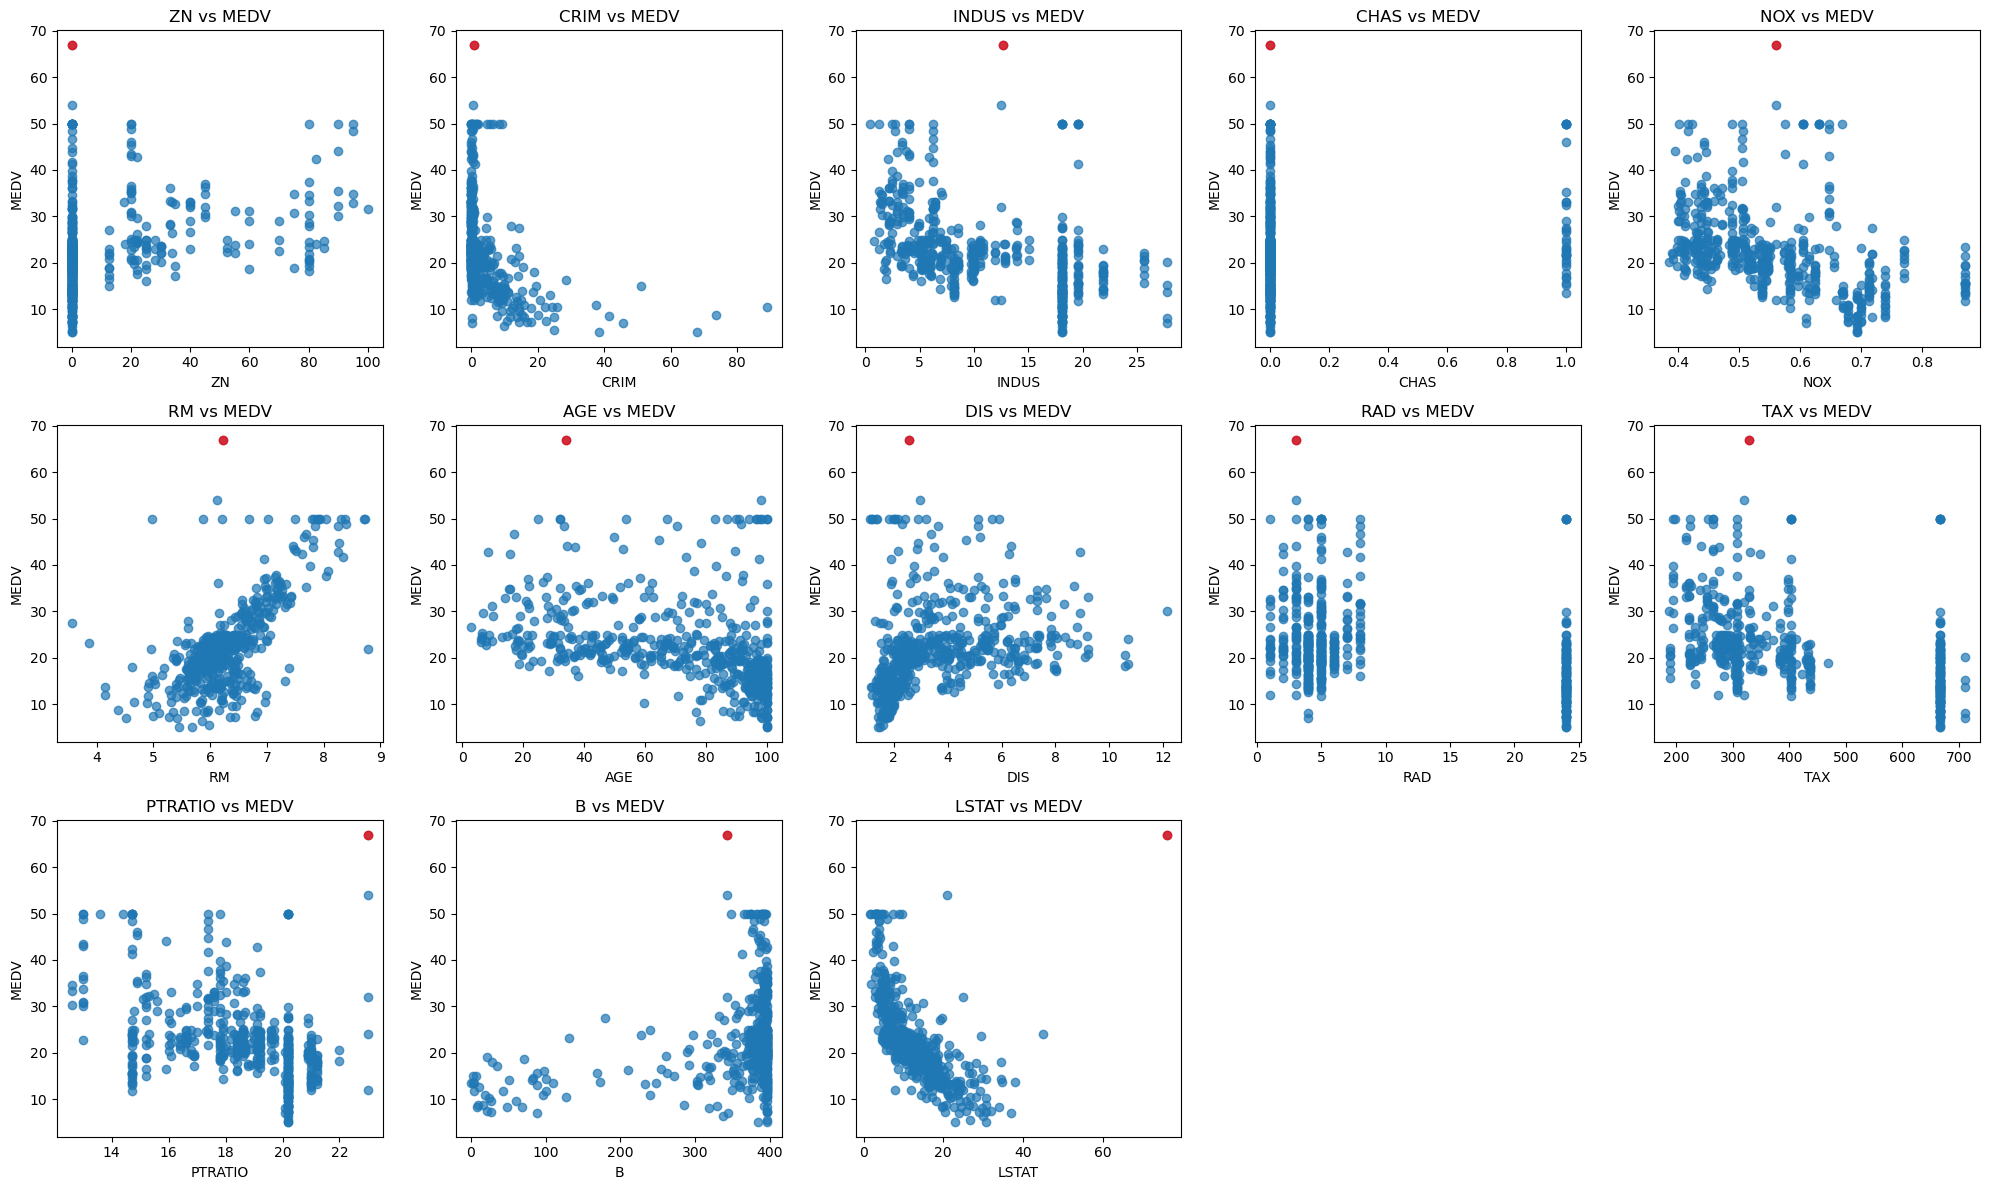

In [206]:
# Simple XY scatter plots between label and different features
feature_candidates = ['ZN', 'CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
num_features = len(feature_candidates)
num_rows = 3
num_cols = (num_features + num_rows - 1) // num_rows
plt.figure(figsize=(num_cols * 4, num_rows * 4))
# Pick an outlier manually
a = data[data['LSTAT'] > 50]

for i, feature in enumerate(feature_candidates):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(data[feature], data['MEDV'], alpha=0.7)
    plt.scatter(a[feature], a['MEDV'], color='red', label='LSTAT > 50', alpha=0.7)
    
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV')
    plt.gca() 
plt.tight_layout()
plt.show()

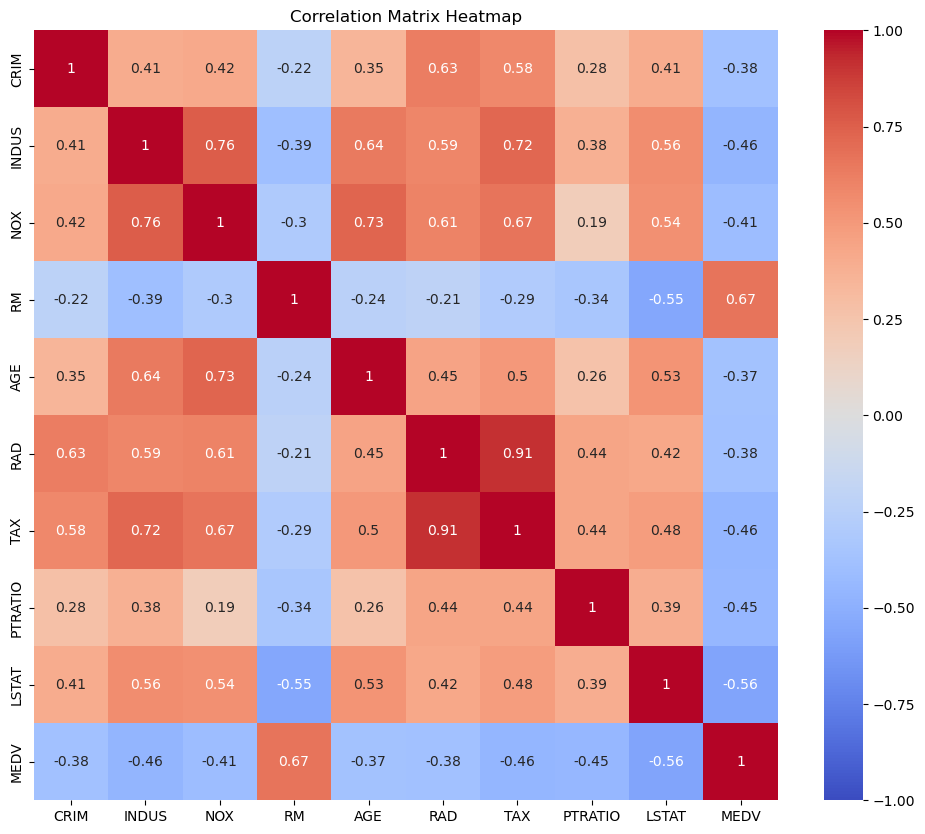

In [207]:
# Draw a correlation matrix (columns compared to other columns)
# Note especially the last column with comparisons to the label column
corr_matrix = data.corr()
medv_corr = corr_matrix['MEDV']

# Filter out columns with correlation between -0.35 and 0.35 with 'MEDV'
columns_to_keep = medv_corr[~medv_corr.abs().between(-0.35, 0.35)].index
filtered_data = data[columns_to_keep]

filtered_corr_matrix = filtered_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [208]:
# See rows which have missing values.
rows_with_nan = filtered_data[filtered_data.isnull().any(axis=1)]
print(rows_with_nan)
filtered_data = filtered_data.fillna(filtered_data.median())
filtered_data['RM'].median()

        CRIM  INDUS    NOX  RM   AGE  RAD  TAX  PTRATIO  LSTAT  MEDV
10   0.22489   7.87  0.524 NaN  94.3    5  311     15.2  20.45  15.0
35   0.06417   5.96  0.499 NaN  68.2    5  279     19.2   9.68  18.9
63   0.12650   5.13  0.453 NaN  43.4    8  284     19.7   9.50  25.0
96   0.11504   2.89  0.445 NaN  69.6    2  276     18.0  11.34  21.4
135  0.55778  21.89  0.624 NaN  98.2    4  437     21.2  16.96  18.1


6.209

In [230]:
# Split into different training, testing and validation sets
train_size = 0.67
test_size = 1-0.67
cross_size = 0.5
X = filtered_data.drop(columns=['MEDV'], axis=1)
y = filtered_data['MEDV']

X_train, X_splitted, y_train, y_splitted = train_test_split(X, y, test_size=test_size, train_size=train_size, shuffle=True)
X_test, X_cross, y_test, y_cross = train_test_split(X_splitted, y_splitted, test_size = cross_size, shuffle=False)
print("Size of training set: " + str(len(X_train)))
print("Size of testing set: " + str(len(y_test)))
print("Size of testing set: " + str(len(y_cross)))

Size of training set: 342
Size of testing set: 84
Size of testing set: 85


In [231]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

Mean squared error: 58.15591606802017


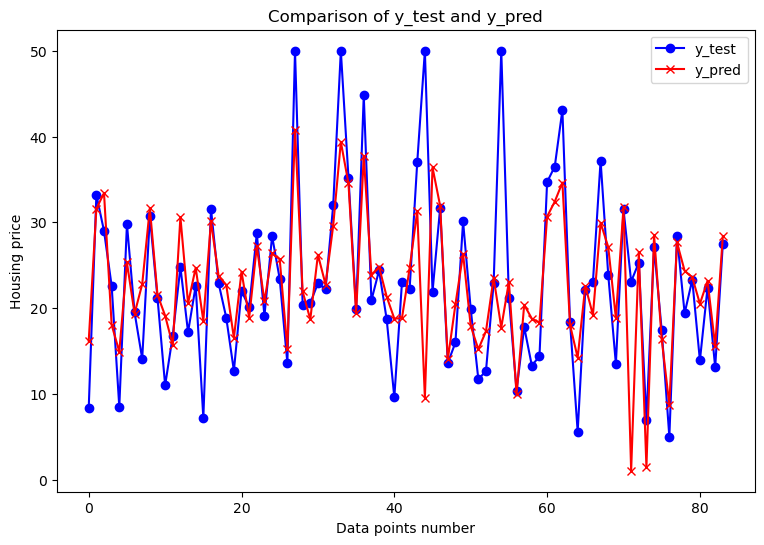

In [232]:
clf = Lasso(alpha=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_test = np.array(y_test)
print("Mean squared error: " + str(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(9, 6))
plt.plot(y_test, label='y_test', marker='o', color='b')
plt.plot(y_pred, label='y_pred', marker='x', color='r')
plt.title('Comparison of y_test and y_pred')
plt.xlabel('Data points number')
plt.ylabel('Housing price')
plt.legend()
plt.show()
